# Fixing model parameters


In this notebook, we demonstrate how to input a fixed parameter into a model instead of a prior.

First, as before, import PyBEAM's pre-coded module.


In [2]:
# import PyBEAM's pre-coded module
import pybeam.precoded as pbp


For this example, we define a simple DDM as before.

In [4]:
# define simpleDDM
model = pbp.simpleDDM()


In [10]:
# parameters for synthetic data
phi = {'tnd' : 0.25, # non-decision time
         'w' : 0.5,  # relative start point
        'mu' : 1.0,  # drift rate
         'b' : 0.5}  # decision threshold location

# generate synthetic data
rt = pbp.simulate(N_sims = 1000,   # number of data points to simulate
                   model = model, # dictionary containing model information
                     phi = phi)   # parameters used to simulate data


We now prepare to call the parameter inference function. We first build our dictionary of priors. However, let's say that we want to fix 'tnd' at a single values instead of making them priors?

To accomplish this, instead of writing a prior in the prior dictionary, we simply put the constant we desire as the value. In this case, we want our non-decision time fixed at 0.25, matching the generated data set; so, for that prior key, we input that value.


In [18]:
# define priors
p = {'p_tnd' : 0.25,
       'p_w' : 'Uniform("w", lower = 0.1, upper = 0.9)',     # prior for relative start
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)',   # prior for drift rate
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.0)'}


We now proceed as normal to complete parameter inference.


In [19]:
# define model condition
c0 = {'rt' : rt,
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu',
       'b' : 'p_b'}

# load into condition dictionary
c = {0 : c0}

# run parameter inference
idata = pbp.inference(model = model,
                     priors = p,
                 conditions = c,
                    samples = 25000,
                     chains = 3,
                      cores = 3,
                  file_name = 'fixed_tnd')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b, mu, w]


Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 44 seconds.


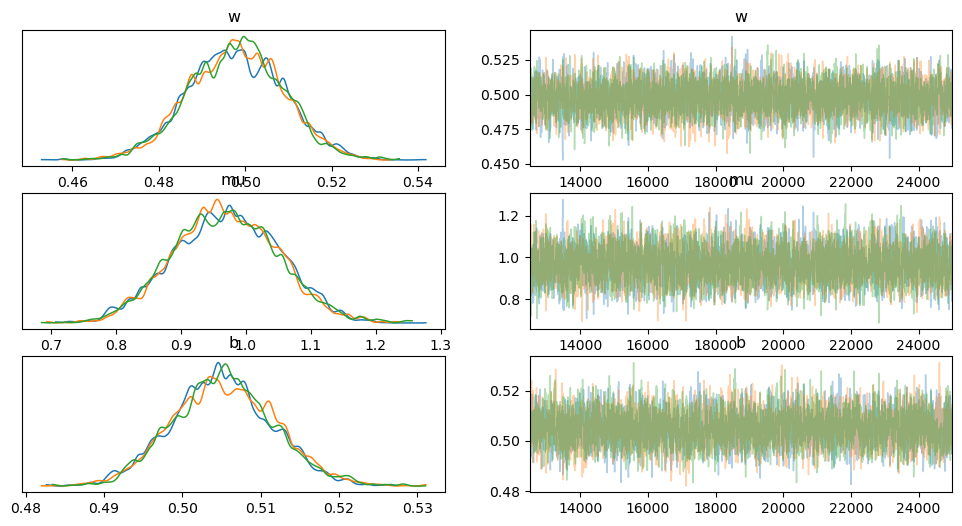

In [21]:
# plot posteriors
pbp.plot_idata(file_name = 'fixed_tnd', burnin = 12500);
